<h1 style="text-align:center; font-size:35px">Edge Detection in images using Fourier Transform</h1>
<p style="text-align:center">By- Sagar Joshi, IIT Indore</p>

<p>In this project, an important application of 2-d Discrete Fourier Transform is shown, which is edge detection 
of images. Edge Detection is important because it helps us to understand the important features of an image which can be stored using relatively lesser amount of memory. The 2-d Discrete Fourier Transform (and its inverse) is given by the formula :</p>

<img src = "https://software.intel.com/content/dam/develop/external/us/en/images/code-image2-154290.gif" width = "500" height = "5000" align = "center">
<p style="text-align:center; font-size:10px">Image source: https://software.intel.com/content/dam/develop/external/us/en/images/code-image2-154290.gif</font></p>

<p>Below is the implementation of relevant concepts to detect edges in an image. The process follows:</p>
<ol>
    <li>Reading the image and changing it to a grayscale image.</li>
    <li>Taking the 2d fft and shifting the zero frequency component to the center.</li>
    <li>  Since edges in an image represent regions of low thickness having high variation of intensity per change in pixel, they represent regions of high frequency in the frequency domain obtained after taking the fft. Hence, a High Pass Filter which discards all the frequencies in a circular region (in the magnitude spectrum) centered at the origin is designed.</li>
    <li>Shifting the zero frequency back to the original position and taking the inverse fft of the new spectrum to obtain the image with only the edges.</li>
</ol>
    

In [14]:
# Importing the relevant libraries.

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [15]:
# Defining a function to convert an image with RGB values to a grayscale image by multiplying
# with appropriate weights.

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

rgb_img = mpimg.imread('sample.jpg') # Reading the image
gray_img = rgb2gray(rgb_img) # Changing to grayscale

print(rgb_img.shape)
print(gray_img.shape)

(532, 800, 3)
(532, 800)


In [16]:
# Taking the 2-d Discrete Fourier Transform of the gray scale image (a 2d array with the value of each element 
# showing the brightness of the corresponding pixel in the grayscale image) and shifting it such that 
# zero frequency components (along both axes) are shifted to the center of the spectrum.

f = np.fft.fft2(gray_img) # 2-d fourier transform
fshift = np.fft.fftshift(f) # Shifting the zero frequency to the center
magnitude_spectrum = 20*np.log(np.abs(fshift)) 

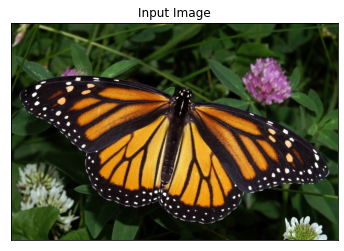

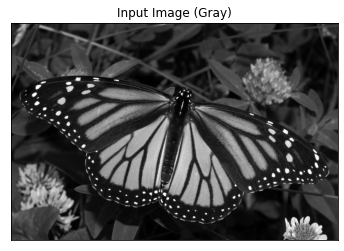

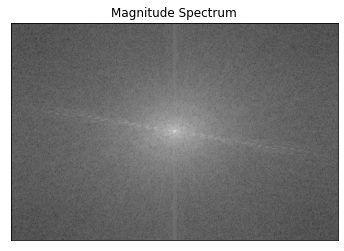

In [17]:
# Showcasing the input image in rgb and grayscale form and also the corresponding magnitude spectrum 
# (after shifting the zero frequency components to the center).

plt.figure(1)
plt.imshow(rgb_img)
plt.title('Input Image' )
plt.xticks([]), plt.yticks([])

plt.figure(2)
plt.imshow(gray_img, cmap=plt.get_cmap('gray'))
plt.title('Input Image (Gray)' )
plt.xticks([]), plt.yticks([])

plt.figure(3)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.xticks([]), plt.yticks([])

plt.show()

In [18]:
# Since edges in an image represent regions of low thickness having high variation of intensity per change in pixel,
# they represent regions of high frequency in the frequency domain obtained after taking the fft. Hence, a high
# pass filter is designed here which discards all frequencies in a circular region centered at the origin 
# (This works because we have shifted the zero frequency to the center). The radius of the circular region can
# be set according to our need.

rows, cols = gray_img.shape
crow, ccol = int(rows / 2), int(cols / 2)  

mask = np.ones((rows, cols), np.uint8) # A mask to be multiplied to the original shifted fft

r = 50 # Radius of the circular region

center = [crow, ccol]
mask_area = np.zeros((rows,cols), bool) # A 2-d array of bools designed to have 'True' value only inside the circular region
for x in range(0, rows):
    for y in range(0, cols):
        mask_area[x,y] = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
        
mask[mask_area] = 0 # For discarding the lower frequencies

<ipython-input-19-85e811e5913a>:7: RuntimeWarning: divide by zero encountered in log
  new_magnitude_spectrum_log = 20*np.log(np.abs(new_fshift))


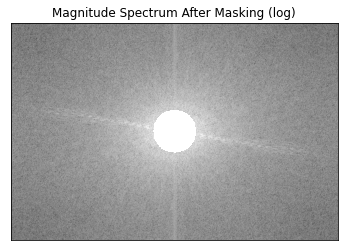

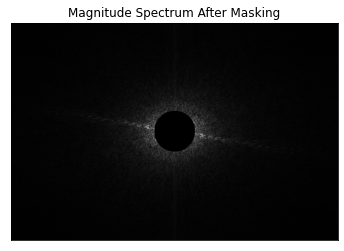

In [19]:
# Multiplying the shifted fft with the mask gives the desired fft having lower frequencies discarded. The circular
# region with discarded frequencies can be seen below. Ideally the region should be black (no intensity), 
# but since log of 0 is not defined, it appears white. If plotted after removing log, the result comes as expected. 
# Still it is clear that by including log, we can better undestand the variation in the frequency domain.

new_fshift = fshift * mask # Applying the mask
new_magnitude_spectrum_log = 20*np.log(np.abs(new_fshift))
new_magnitude_spectrum = 20*np.abs(new_fshift)

plt.figure(1)
plt.imshow(new_magnitude_spectrum_log, cmap='gray')
plt.title('Magnitude Spectrum After Masking (log)')
plt.xticks([]), plt.yticks([])

plt.figure(2)
plt.imshow(new_magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum After Masking')
plt.xticks([]), plt.yticks([])

plt.show()

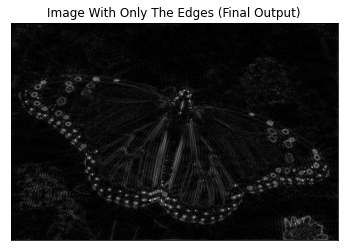

In [20]:
# Getting the image with the edges after shifting the zero frequency back to the original position and by taking
# the inverse fourier transform.

f_ishift = np.fft.ifftshift(new_fshift) # Shifting the zero frequency back to the original position
img_edge = np.fft.ifft2(f_ishift) # Inverse fft
img_edge = np.abs(img_edge) # Taking absolute value to do away with complex numbers

plt.figure(1) 
plt.imshow(img_edge, cmap='gray')
plt.title('Image With Only The Edges (Final Output)')
plt.xticks([]), plt.yticks([])

plt.show()

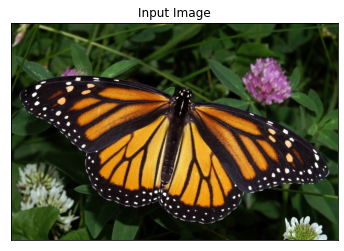

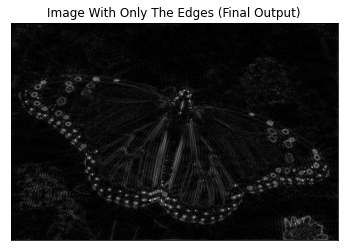

In [21]:
# Final comparison between the input and the output.

plt.figure(1)
plt.imshow(rgb_img)
plt.title('Input Image' )
plt.xticks([]), plt.yticks([])

plt.figure(2) 
plt.imshow(img_edge, cmap='gray')
plt.title('Image With Only The Edges (Final Output)')
plt.xticks([]), plt.yticks([])

plt.show()

# Thank You

<p>Resources referred for this project:</p>
<ul>
    <li>https://www.youtube.com/watch?v=Iz6C1ny-F2Q</li>
    <li>https://www.youtube.com/watch?v=oACegp4iGi0</li>
</ul>